#RFM Analysis and Affinity Analysis

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import string
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/Technical test'
df = pd.read_csv(os.path.join(path, "Transaction Data.csv"), sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159355 entries, 0 to 159354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   t_store_code  159355 non-null  object 
 1   t_date        159355 non-null  object 
 2   t_struk_id    159355 non-null  object 
 3   t_members     159355 non-null  float64
 4   t_plu         159355 non-null  int64  
 5   t_descp       159355 non-null  object 
 6   t_category    159355 non-null  object 
 7   t_net         159355 non-null  float64
 8   t_qty         159355 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 10.9+ MB


# Pre-processing data

In [ ]:
df.head()

,t_store_code,t_date,t_struk_id,t_members,t_plu,t_descp,t_category,t_net,t_qty
0,Q060,13/01/2021,Q060QZ012021-01-136087765,9.990000e+15,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1
1,Q060,13/01/2021,Q060QZ012021-01-136087766,9.990000e+15,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1
2,J048,17/01/2021,J048XZ012021-01-172581477,9.990000e+15,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1
3,Q060,24/01/2021,Q060QZ012021-01-24504451,9.990000e+15,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1
4,Q060,20/01/2021,Q060QZ012021-01-207051351,9.990000e+15,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1


In [ ]:
missing_data = df.isnull().sum()
print("Jumlah Missing Data di setiap kolom:")
print(missing_data)

Jumlah Missing Data di setiap kolom:
t_store_code    0
t_date          0
t_struk_id      0
t_members       0
t_plu           0
t_descp         0
t_category      0
t_net           0
t_qty           0
dtype: int64


In [ ]:
duplicate_data = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_data}")

Jumlah Data Duplikat: 0


In [ ]:
data_object = df[[ 't_members', 't_plu', 't_descp', 't_category', "t_struk_id"]]
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

t_members : 31
t_plu : 5027
t_descp : 5027
t_category : 312
t_struk_id : 39874


In [ ]:
df = df[df['t_category'] != 'EMBALASI'].copy()

In [ ]:
def describe_with_format(df):
  return df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

print(describe_with_format(df[['t_net', 't_qty']]))

            t_net      t_qty
count   157111.00  157111.00
mean     17402.67       1.39
std      26440.21       1.54
min          0.00       1.00
25%       6818.18       1.00
50%      11545.45       1.00
75%      18400.00       1.00
max    2424547.92     135.00


In [ ]:
# Convert 'Order Date' to datetime objects
df['t_date'] = pd.to_datetime(df['t_date'])

# Find the oldest order date
oldest_order_date = df['t_date'].min()

print(f"The oldest order date is: {oldest_order_date}")

The oldest order date is: 2020-01-01 00:00:00


/tmp/ipython-input-39580646.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['t_date'] = pd.to_datetime(df['t_date'])


In [ ]:
# Find the oldest order date
last_order_date = df['t_date'].max()

print(f"The oldest order date is: {last_order_date}")

The oldest order date is: 2021-03-31 00:00:00


In [ ]:
df['t_plu'] = df['t_plu'].apply(lambda x: '{:.0f}'.format(float(x)))

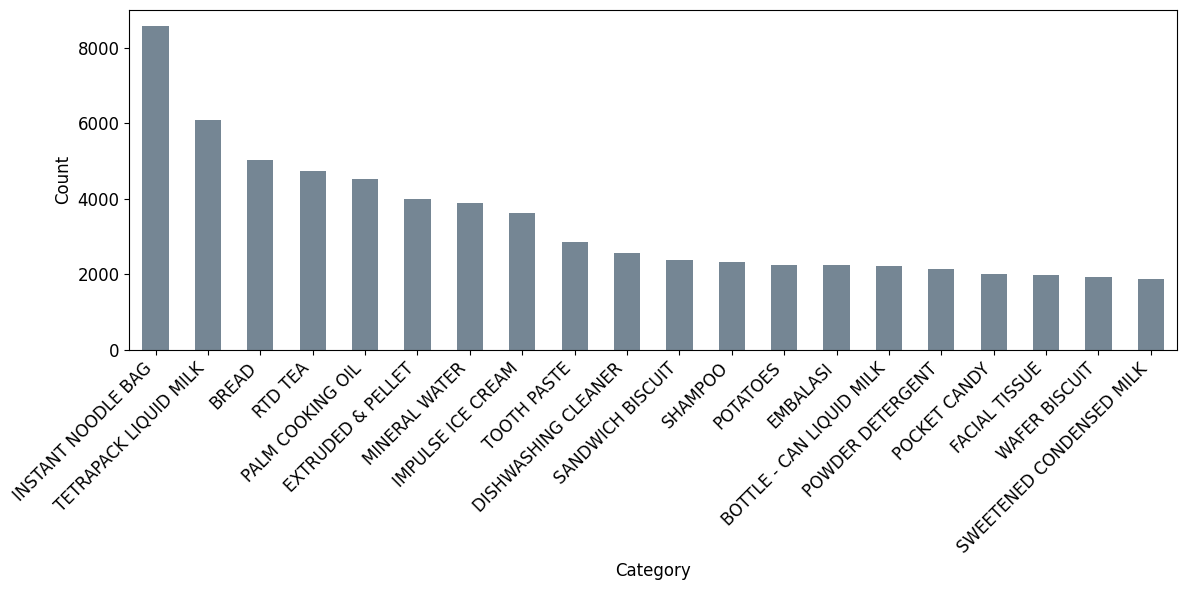

In [ ]:
# Ambil 20 kategori teratas
top_20_categories = df['t_category'].value_counts().nlargest(20)

# Plot
plt.figure(figsize=(12, 6))
top_20_categories.plot(kind='bar', color='#758694', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Split member and non member data

In [ ]:
df['t_members'].unique()[:30]

array([9.99000000e+15, 7.04095698e+10, 1.00000000e+16, 5.76758341e+10,
       2.15685948e+10, 5.88666667e+10, 3.86525827e+10, 5.26064871e+09,
       4.30999558e+10, 5.28481378e+10, 4.83234896e+10, 4.10262967e+10,
       4.83234787e+10, 5.76283065e+10, 3.61208668e+10, 8.89000000e+15,
       5.27635936e+10, 5.61530322e+10, 2.38000000e+15, 7.21501626e+10,
       8.13788612e+08, 5.88648233e+10, 5.28491721e+10, 8.57926096e+10,
       5.28686875e+10, 7.67873001e+10, 3.89008931e+10, 4.32675504e+10,
       6.68502137e+10, 4.31841449e+10])

In [ ]:
df['t_members'] = df['t_members'].apply(lambda x: '{:.0f}'.format(float(x)))

In [ ]:
non_member_ids = ['2380000000000000', '8890000000000000', '9990000000000000', '10000000000000000']

df_non_member = df[df['t_members'].isin(non_member_ids)].copy()
df_member = df[~df['t_members'].isin(non_member_ids)].copy()

In [ ]:
print(df_non_member.shape)
print(df_member.shape)

(156531, 9)
(580, 9)


In [ ]:
df_non_member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156531 entries, 0 to 159354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   t_store_code  156531 non-null  object        
 1   t_date        156531 non-null  datetime64[ns]
 2   t_struk_id    156531 non-null  object        
 3   t_members     156531 non-null  object        
 4   t_plu         156531 non-null  object        
 5   t_descp       156531 non-null  object        
 6   t_category    156531 non-null  object        
 7   t_net         156531 non-null  float64       
 8   t_qty         156531 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 11.9+ MB


In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 77 to 159216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   t_store_code  580 non-null    object        
 1   t_date        580 non-null    datetime64[ns]
 2   t_struk_id    580 non-null    object        
 3   t_members     580 non-null    object        
 4   t_plu         580 non-null    object        
 5   t_descp       580 non-null    object        
 6   t_category    580 non-null    object        
 7   t_net         580 non-null    float64       
 8   t_qty         580 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 45.3+ KB


# transaksi member (RFM Analysis)

In [ ]:
data_object = df_member[[ 't_members', 't_plu', 't_descp', 't_category', "t_struk_id"]]
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

t_members : 27
t_plu : 389
t_descp : 389
t_category : 127
t_struk_id : 105


Pisahkan transaksi yang berkaitan dengan promo. Keluarkan barang promosi, kecuali untuk MERCHANDISE GOODS yang nilai t_net-nya lebih dari 1 (asumsinya: itu pembelian sungguhan, bukan hadiah).

In [ ]:
df_member_rfm = df_member[
    ~(
        (df_member['t_category'] == 'GIFT CARD') |
        (df_member['t_category'] == 'PROMOTION GOODS') |
        ((df_member['t_category'] == 'MERCHANDISE GOODS') & (df_member['t_net'] <= 1))
    )
].copy()

In [ ]:
df_member_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 1146 to 159216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   t_store_code  574 non-null    object        
 1   t_date        574 non-null    datetime64[ns]
 2   t_struk_id    574 non-null    object        
 3   t_members     574 non-null    object        
 4   t_plu         574 non-null    object        
 5   t_descp       574 non-null    object        
 6   t_category    574 non-null    object        
 7   t_net         574 non-null    float64       
 8   t_qty         574 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 44.8+ KB


## Calculate Recency

Jarak waktu sejak terakhir kali seorang pelanggan melakukan transaksi.

In [ ]:
df_recency = df_member_rfm.groupby(by='t_members', as_index=False)['t_date'].max()
df_recency.columns = ['t_members', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,t_members,LastPurchaseDate,Recency
0,21568594834,2021-03-29,2
1,36120866834,2020-07-06,268
2,38652582734,2020-10-27,155
3,38900893134,2021-02-14,45
4,41026296734,2020-09-17,195


## Calculate Frequency

Jumlah transaksi atau kunjungan pembelian yang dilakukan oleh seorang pelanggan dalam periode tertentu.

In [ ]:
frequency_df = df_member_rfm.groupby('t_members')['t_date'].nunique().reset_index()
frequency_df.columns = ['t_members', 'Frequency']
frequency_df.head()

,t_members,Frequency
0,21568594834,4
1,36120866834,1
2,38652582734,2
3,38900893134,1
4,41026296734,11


## Calculate Monetary Value

Total uang yang dibelanjakan oleh seorang pelanggan selama periode analisis.

In [ ]:
df_member_rfm['Total'] = df_member_rfm['t_net']  # Total spent by each customer
monetary_df = df_member_rfm.groupby(by='t_members', as_index=False)['Total'].sum()
monetary_df.columns = ['t_members', 'Monetary']
monetary_df.head()

,t_members,Monetary
0,21568594834,714727.37
1,36120866834,183545.46
2,38652582734,246890.94
3,38900893134,77000.00
4,41026296734,1255546.32


In [ ]:
monetary_df['Monetary'].describe()

,Monetary
count,2.700000e+01
mean,3.562688e+05
std,5.077337e+05
min,1.509091e+04
25%,4.650001e+04
50%,1.292728e+05
75%,3.265910e+05
max,1.987455e+06


## merge recency, frequency, and monetary data

In [ ]:
rf_df = df_recency.merge(frequency_df, on='t_members')
rfm_df = rf_df.merge(monetary_df, on='t_members').drop(columns='LastPurchaseDate')
rfm_df.head()

,t_members,Recency,Frequency,Monetary
0,21568594834,2,4,714727.37
1,36120866834,268,1,183545.46
2,38652582734,155,2,246890.94
3,38900893134,45,1,77000.00
4,41026296734,195,11,1255546.32


## RFM Score

RECENCY SCORE

1 - long standing customers  
2 - relatively recent customers  
3 - recent customers

In [ ]:
def recency_score(days):
    if days <= 30:
        return 3
    elif days <= 90:
        return 2
    else:
        return 1

rfm_df['R_Score'] = rfm_df['Recency'].apply(recency_score)

In [ ]:
rfm_df.head()

,t_members,Recency,Frequency,Monetary,R_Score
0,21568594834,2,4,714727.37,3
1,36120866834,268,1,183545.46,1
2,38652582734,155,2,246890.94,1
3,38900893134,45,1,77000.00,2
4,41026296734,195,11,1255546.32,1


FREQUENCY SCORE

1 - purchases rarely (single orders)  
2 - purchases infrequently  
3 - purchases often

In [ ]:
def frequency_score(freq):
    if freq >= 10:
        return 3
    elif freq >= 3:
        return 2
    else:
        return 1

rfm_df['F_Score'] = rfm_df['Frequency'].apply(frequency_score)

In [ ]:
rfm_df.head()

,t_members,Recency,Frequency,Monetary,R_Score,F_Score
0,21568594834,2,4,714727.37,3,2
1,36120866834,268,1,183545.46,1,1
2,38652582734,155,2,247072.76,1,1
3,38900893134,45,1,77000.00,2,1
4,41026296734,195,11,1255546.32,1,3


MONETARY VALUE SCORE

1 - low value of purchases  
2 - average value of purchases  
3 - high value of purchases

In [ ]:
def monetary_score(value):
    if value >= 350000:
        return 3
    elif value >= 100000:
        return 2
    else:
        return 1

rfm_df['M_Score'] = rfm_df['Monetary'].apply(monetary_score)

In [ ]:
rfm_df.head()

,t_members,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,21568594834,2,4,714727.37,3,2,3,323
1,36120866834,268,1,183545.46,1,1,2,112
2,38652582734,155,2,246890.94,1,1,2,112
3,38900893134,45,1,77000.00,2,1,1,211
4,41026296734,195,11,1255546.32,1,3,3,133


Segment customer based on RFM score

In [ ]:
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) +
    rfm_df['F_Score'].astype(str) +
    rfm_df['M_Score'].astype(str)
)

In [ ]:
segment_map = {
    '333': 'Champions',
    '332': 'Loyal Customers',
    '331': 'Recent Customers',
    '323': 'Potential Loyalist',
    '322': 'Recent Customers',
    '321': 'Recent Customers',
    '313': 'Recent Customers',
    '312': 'Recent Customers',
    '311': 'Recent Customers',
    '233': 'Promising',
    '232': 'Customers Needing Attention',
    '231': 'Customers Needing Attention',
    '223': 'Customers Needing Attention',
    '222': 'About to Sleep',
    '221': 'At Risk',
    '213': 'At Risk',
    '212': "Can't Lose Them",
    '211': "Can't Lose Them",
    '133': 'Promising',
    '132': 'Hibernating',
    '131': 'Hibernating',
    '123': 'Hibernating',
    '122': 'Hibernating',
    '121': 'Hibernating',
    '113': 'Hibernating',
    '112': 'Hibernating',
    '111': 'Lost'
}

In [ ]:
rfm_df['Segment'] = rfm_df['RFM_Score'].map(segment_map).fillna('Others')

In [ ]:
rfm_df.head()

,t_members,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,21568594834,2,4,714727.37,3,2,3,323,Potential Loyalist
1,36120866834,268,1,183545.46,1,1,2,112,Hibernating
2,38652582734,155,2,246890.94,1,1,2,112,Hibernating
3,38900893134,45,1,77000.00,2,1,1,211,Can't Lose Them
4,41026296734,195,11,1255546.32,1,3,3,133,Promising


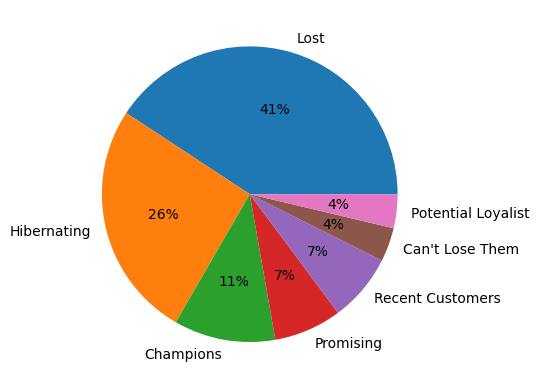

In [ ]:
plt.pie(rfm_df.Segment.value_counts(),
        labels=rfm_df.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
rfm_df.head()

,t_members,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,21568594834,2,4,714727.37,3,2,3,323,Potential Loyalist
1,36120866834,268,1,183545.46,1,1,2,112,Hibernating
2,38652582734,155,2,246890.94,1,1,2,112,Hibernating
3,38900893134,45,1,77000.00,2,1,1,211,Can't Lose Them
4,41026296734,195,11,1255546.32,1,3,3,133,Promising


In [ ]:
df_member_rfm.head()

,t_store_code,t_date,t_struk_id,t_members,t_plu,t_descp,t_category,t_net,t_qty,Total
1146,J048,2021-02-01,J048XZ012021-02-014554392,21568594834,411940,PALMOLIVE BW ABS RELAX REF450ML,BEAUTY LIQUID SOAP,35000.0,1,35000.0
1237,Q060,2020-06-27,Q060QZ012020-06-275014161,57675834134,415101,PERTIWI BALI BRS HITAM 1KG,RICE,33000.0,1,33000.0
1281,J048,2020-03-05,J048XZ012020-03-054019422,38652582734,173904,REFINA GARAM MEJA 500G,SALT,9800.0,1,9800.0
1774,Q060,2021-03-17,Q060QZ012021-03-175045907,57675834134,160037,SASA SANTAN BUBUK 20G,COCONUT MILK,4000.0,2,4000.0
2220,Q060,2020-01-10,Q060QZ012020-01-107091763,57675834134,121198,FRESCO KOPI KRIM SUSU 10X28G,COFFE MIX,8000.0,1,8000.0


In [ ]:
# Pastikan t_store_code tidak duplikat per member
store_code_df = df_member[['t_members', 't_store_code']].drop_duplicates()

# Gabungkan ke rfm_df berdasarkan t_members
rfm_df = rfm_df.merge(store_code_df, on='t_members', how='left')

rfm_df.head(27)

,t_members,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,t_store_code
0,21568594834,2,4,714727.37,3,2,3,323,Potential Loyalist,J048
1,36120866834,268,1,183545.46,1,1,2,112,Hibernating,J048
2,38652582734,155,2,246890.94,1,1,2,112,Hibernating,J048
3,38900893134,45,1,77000.00,2,1,1,211,Can't Lose Them,J048
4,41026296734,195,11,1255546.32,1,3,3,133,Promising,Q060
5,43099955834,241,1,129272.75,1,1,2,112,Hibernating,J048
6,43184144934,312,1,35454.56,1,1,1,111,Lost,J048
7,43267550434,449,1,21636.36,1,1,1,111,Lost,J048
8,48323478734,359,1,226272.76,1,1,2,112,Hibernating,Q060
9,48323489634,426,1,370909.14,1,1,3,113,Hibernating,Q060


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   t_members     27 non-null     object 
 1   Recency       27 non-null     int64  
 2   Frequency     27 non-null     int64  
 3   Monetary      27 non-null     float64
 4   R_Score       27 non-null     int64  
 5   F_Score       27 non-null     int64  
 6   M_Score       27 non-null     int64  
 7   RFM_Score     27 non-null     object 
 8   Segment       27 non-null     object 
 9   t_store_code  27 non-null     object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.2+ KB


In [ ]:
# stores = df_member_rfm['t_store_code'].unique()

# fig, axes = plt.subplots(1, len(stores), figsize=(12, 6))

# for i, store in enumerate(stores):
#     # Filter data berdasarkan store
#     store_data = df_member_rfm[df_member_rfm['t_store_code'] == store]

#     # Hitung proporsi segment
#     segment_counts = store_data['Segment'].value_counts()

#     # Plot pie chart
#     axes[i].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
#     axes[i].axis('equal')  # Biar bulat
#     axes[i].set_title(f'Store {store}')

# plt.suptitle('Customer Segmentation per Store', fontsize=14)
# plt.tight_layout()
# plt.show()

In [ ]:
# stores = df_member_rfm['t_store_code'].unique()
# fig, axes = plt.subplots(1, len(stores), figsize=(14, 6), sharey=True)

# for i, store in enumerate(stores):
#     # Filter data berdasarkan store
#     store_data = df_member_rfm[df_member_rfm['t_store_code'] == store]

#     # Hitung jumlah pelanggan per segmen
#     segment_counts = store_data['Segment'].value_counts().sort_values(ascending=True)

#     # Buat bar chart
#     axes[i].barh(segment_counts.index, segment_counts.values, color='skyblue')
#     axes[i].set_title(f'Store {store}')
#     axes[i].set_xlabel('Jumlah Member')
#     axes[i].set_ylabel('Segment')

# plt.suptitle('Customer Segmentation per Store (Bar Chart)', fontsize=16)
# plt.tight_layout()
# plt.show()

In [ ]:
#df_member_rfm.groupby('t_store_code')['t_members'].nunique()

In [ ]:
df_member.to_excel('df_member.xlsx', index=False)
df_non_member.to_excel('df_non_member.xlsx', index=False)
rfm_df.to_excel('df_rfm.xlsx', index=False)

In [ ]:
df.to_excel('df_clean.xlsx', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157111 entries, 0 to 159354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   t_store_code  157111 non-null  object        
 1   t_date        157111 non-null  datetime64[ns]
 2   t_struk_id    157111 non-null  object        
 3   t_members     157111 non-null  object        
 4   t_plu         157111 non-null  object        
 5   t_descp       157111 non-null  object        
 6   t_category    157111 non-null  object        
 7   t_net         157111 non-null  float64       
 8   t_qty         157111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 12.0+ MB


# Affinity Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157111 entries, 0 to 159354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   t_store_code  157111 non-null  object        
 1   t_date        157111 non-null  datetime64[ns]
 2   t_struk_id    157111 non-null  object        
 3   t_members     157111 non-null  object        
 4   t_plu         157111 non-null  object        
 5   t_descp       157111 non-null  object        
 6   t_category    157111 non-null  object        
 7   t_net         157111 non-null  float64       
 8   t_qty         157111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 12.0+ MB


In [ ]:
data_object = df[[ 't_members', 't_plu', 't_descp', 't_category', "t_struk_id"]]
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

t_members : 31
t_plu : 5021
t_descp : 5021
t_category : 311
t_struk_id : 39874


In [ ]:
df_aff1 = df[
    ~(
        (df['t_category'] == 'GIFT CARD') |
        (df['t_category'] == 'PROMOTION GOODS') |
        ((df['t_category'] == 'MERCHANDISE GOODS') & (df['t_net'] <= 1))
    )
].copy()

In [ ]:
df_aff1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156308 entries, 798 to 159354
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   t_store_code  156308 non-null  object        
 1   t_date        156308 non-null  datetime64[ns]
 2   t_struk_id    156308 non-null  object        
 3   t_members     156308 non-null  object        
 4   t_plu         156308 non-null  object        
 5   t_descp       156308 non-null  object        
 6   t_category    156308 non-null  object        
 7   t_net         156308 non-null  float64       
 8   t_qty         156308 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 11.9+ MB


In [ ]:
data_object = df_aff1[[ 't_members', 't_plu', 't_descp', 't_category', "t_struk_id"]]
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

t_members : 31
t_plu : 5012
t_descp : 5012
t_category : 309
t_struk_id : 39863


In [ ]:
# df_aff = df_aff[['t_struk_id', 't_descp']].drop_duplicates()

# # Group produk yang dibeli per struk
# df_aff = df_aff.groupby('t_struk_id')['t_descp'].apply(list).reset_index()

# # Tampilkan hasil
# df_aff.head()

,t_struk_id,t_descp
0,J048XZ012020-01-011235379,"[LIFEBUOY B.SOAP LEMON FRS4X110G, PEPSODENT PG..."
1,J048XZ012020-01-011235383,"[BIORE BW GUARD E.COOL REF450ML, NIVEA MEN RO ..."
2,J048XZ012020-01-011235385,"[SOS PL APPLE REF 750ML, IMBOOST SIRUP 60ML]"
3,J048XZ012020-01-011235392,"[ROSE BRAND GULA TEBU PRM 1KG, ABC SARDINES TO..."
4,J048XZ012020-01-011235395,"[SOKLIN SOFTERGENT PINK 770G, SOKLIN SOFTERGEN..."


In [ ]:
# df_aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39863 entries, 0 to 39862
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   t_struk_id  39863 non-null  object
 1   t_descp     39863 non-null  object
dtypes: object(2)
memory usage: 623.0+ KB


## By category

In [ ]:
# 1. Agregasi jumlah produk berdasarkan struk dan kategori
grouped = df_aff1.groupby(['t_struk_id', 't_category'])['t_qty'].sum().reset_index()

# 2. Pivot table: baris = struk, kolom = kategori produk
pivot_df = grouped.pivot(index='t_struk_id', columns='t_category', values='t_qty')

# 3. Ganti NaN jadi 0 dan ubah ke float/int
pivot_df = pivot_df.fillna(0).astype(float).reset_index()

# 4. (Opsional) Ubah nama kolom agar lebih bersih
pivot_df.columns.name = None  # Hapus nama kolom 't_category' dari header
pivot_df.head()

,t_struk_id,ACCESSORIES TRAVEL,ADHESIVE TAPE & GLUE,ADULT COUGH MEDICINE,ADULT DIAPERS,ADULT VITAMINS/SUPLEMENT,AEROSOL AIR FRESHENER,AEROSOL INSECTICIDES,ALKALINE,ANALGESIC,...,WAFER BISCUIT,WET TISSUE,WOMEN BODY SPRAY,WOMEN COLOGNE,WOMEN DEO,WOMEN PARFUME & EDT,WRITING BOOK,YOGHURT,YOGHURT BEVERAGE,ZINC CARBON
0,J048XZ012020-01-011235379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,J048XZ012020-01-011235383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J048XZ012020-01-011235385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J048XZ012020-01-011235392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,J048XZ012020-01-011235395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39863 entries, 0 to 39862
Columns: 310 entries, t_struk_id to ZINC CARBON
dtypes: float64(309), object(1)
memory usage: 94.3+ MB


In [ ]:
def encode_units(x):
    try:
        x = float(x)
        return 1 if x >= 1 else 0
    except:
        return 0

# Pisahkan kolom ID
basket_sets = pivot_df.copy()
basket_sets.iloc[:, 1:] = basket_sets.iloc[:, 1:].applymap(encode_units)

basket_sets.head()

/tmp/ipython-input-25-1452580815.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets.iloc[:, 1:] = basket_sets.iloc[:, 1:].applymap(encode_units)


,t_struk_id,ACCESSORIES TRAVEL,ADHESIVE TAPE & GLUE,ADULT COUGH MEDICINE,ADULT DIAPERS,ADULT VITAMINS/SUPLEMENT,AEROSOL AIR FRESHENER,AEROSOL INSECTICIDES,ALKALINE,ANALGESIC,...,WAFER BISCUIT,WET TISSUE,WOMEN BODY SPRAY,WOMEN COLOGNE,WOMEN DEO,WOMEN PARFUME & EDT,WRITING BOOK,YOGHURT,YOGHURT BEVERAGE,ZINC CARBON
0,J048XZ012020-01-011235379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,J048XZ012020-01-011235383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J048XZ012020-01-011235385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J048XZ012020-01-011235392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,J048XZ012020-01-011235395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Buat salinan hanya kolom produk (tanpa kolom invoice/no nota)
basket_only = basket_sets.drop(columns='t_struk_id', errors='ignore')

# Pastikan semua kolom sudah benar berupa 0 dan 1 (bool atau int)
print(basket_only.dtypes.unique())

[dtype('float64')]


In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=bdb0008965deb450135e982c4b4007cea79762a23fd4566fdfb094d0b190a633
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
frequent_itemsets = apriori(basket_only, min_support=0.01, use_colnames=True)
frequent_itemsets.head(10)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.019291,(ADULT VITAMINS/SUPLEMENT)
1,0.019216,(AEROSOL INSECTICIDES)
2,0.012618,(ANTISEPTIC)
3,0.014123,(BAG CANDY)
4,0.016883,(BAG TEA)
5,0.034217,(BAR SOAP)
6,0.013546,(BEAUTY COTTON)
7,0.031332,(BEAUTY LIQUID SOAP)
8,0.033414,(BLOCK CHOCOLATE)
9,0.026616,(BODY LOTION)


In [ ]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   119 non-null    float64
 1   itemsets  119 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.06)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(BAR SOAP),(TOOTH PASTE),0.034217,0.067004,0.013396,0.391496,5.842826,1.0,0.011103,1.533260,0.858216,0.152528,0.347795,0.295710
1,(TOOTH PASTE),(BAR SOAP),0.067004,0.034217,0.013396,0.199925,5.842826,1.0,0.011103,1.207116,0.888375,0.152528,0.171579,0.295710
2,(TETRAPACK LIQUID MILK),(BOTTLE - CAN LIQUID MILK),0.119735,0.049821,0.012192,0.101823,2.043787,1.0,0.006226,1.057897,0.580180,0.077475,0.054729,0.173268
3,(BOTTLE - CAN LIQUID MILK),(TETRAPACK LIQUID MILK),0.049821,0.119735,0.012192,0.244713,2.043787,1.0,0.006226,1.165471,0.537490,0.077475,0.141978,0.173268
4,(EXTRUDED & PELLET),(BREAD),0.077114,0.106841,0.013622,0.176643,1.653325,1.0,0.005383,1.084777,0.428177,0.079971,0.078152,0.152069


In [ ]:
result1 = rules1[(rules1['lift'] >= 0.06) &
               (rules1['confidence'] >= 0.06)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(BAR SOAP),(TOOTH PASTE),0.034217,0.067004,0.013396,0.391496,5.842826,1.0,0.011103,1.533260,0.858216,0.152528,0.347795,0.295710
15,(CHILLI),(INSTANT NOODLE BAG),0.031684,0.121441,0.011364,0.358670,2.953451,1.0,0.007516,1.369901,0.683055,0.080163,0.270020,0.226123
64,(SHAMPOO),(TOOTH PASTE),0.052455,0.067004,0.015478,0.295074,4.403796,1.0,0.011963,1.323537,0.815711,0.148854,0.244449,0.263037
21,(POWDER DETERGENT),(DISHWASHING CLEANER),0.050749,0.061109,0.014299,0.281760,4.610751,1.0,0.011198,1.307210,0.824982,0.146567,0.235012,0.257875
30,(POTATOES),(EXTRUDED & PELLET),0.047111,0.077114,0.012066,0.256124,3.321357,1.0,0.008433,1.240644,0.733473,0.107582,0.193967,0.206299
3,(BOTTLE - CAN LIQUID MILK),(TETRAPACK LIQUID MILK),0.049821,0.119735,0.012192,0.244713,2.043787,1.0,0.006226,1.165471,0.537490,0.077475,0.141978,0.173268
18,(DISHWASHING CLEANER),(PALM COOKING OIL),0.061109,0.111407,0.014901,0.243842,2.188761,1.0,0.008093,1.175143,0.578470,0.094541,0.149040,0.188798
58,(POWDER DETERGENT),(TOOTH PASTE),0.050749,0.067004,0.011966,0.235788,3.518994,1.0,0.008566,1.220860,0.754097,0.113114,0.180905,0.207187
20,(DISHWASHING CLEANER),(POWDER DETERGENT),0.061109,0.050749,0.014299,0.233990,4.610751,1.0,0.011198,1.239215,0.834086,0.146567,0.193038,0.257875
16,(DISHWASHING CLEANER),(INSTANT NOODLE BAG),0.061109,0.121441,0.014148,0.231527,1.906500,1.0,0.006727,1.143253,0.506426,0.084016,0.125303,0.174016


In [ ]:
apr_result.iloc[60]

,55
antecedents,(PALM COOKING OIL)
consequents,(TETRAPACK LIQUID MILK)
antecedent support,0.111407
consequent support,0.119735
support,0.010486
confidence,0.094123
lift,0.786093
representativity,1.0
leverage,-0.002853
conviction,0.971727


# percentage promotional goods

In [ ]:
# Tandai baris produk promosi
df['is_promo'] = (
    (df['t_category'] == 'GIFT CARD') |
    (df['t_category'] == 'PROMOTION GOODS') |
    ((df['t_category'] == 'MERCHANDISE GOODS') & (df['t_net'] <= 1))
)

In [ ]:
df.head()

,t_store_code,t_date,t_struk_id,t_members,t_plu,t_descp,t_category,t_net,t_qty,is_promo,member_type
0,Q060,2021-01-13,Q060QZ012021-01-136087765,9990000000000000,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1,True,Non-member
1,Q060,2021-01-13,Q060QZ012021-01-136087766,9990000000000000,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1,True,Non-member
2,J048,2021-01-17,J048XZ012021-01-172581477,9990000000000000,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1,True,Non-member
3,Q060,2021-01-24,Q060QZ012021-01-24504451,9990000000000000,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1,True,Non-member
4,Q060,2021-01-20,Q060QZ012021-01-207051351,9990000000000000,891946,DISNEY PRINCESS STATIONERY SET,MERCHANDISE GOODS,0.0,1,True,Non-member


In [ ]:
non_member_ids = ['2380000000000000', '8890000000000000', '9990000000000000', '10000000000000000']

# Buat kolom member type
df['member_type'] = df['t_members'].apply(
    lambda x: 'Non-member' if x in non_member_ids else 'Member'
)

In [ ]:
# Ambil struk unik yang membeli produk promo
promo_struks = df[df['is_promo']][['t_store_code', 't_struk_id', 'member_type']].drop_duplicates()
promo_struks['promo_taken'] = 1

In [ ]:
# Semua struk unik
total_struks = df[['t_store_code', 't_struk_id', 'member_type']].drop_duplicates()
total_struks['total_transaksi'] = 1

In [ ]:
# Merge promo info ke total transaksi
merged = total_struks.merge(promo_struks, on=['t_store_code', 't_struk_id', 'member_type'], how='left')
merged['promo_taken'] = merged['promo_taken'].fillna(0)

# Agregasi: total transaksi & promo transaksi per store & member_type
summary = merged.groupby(['t_store_code', 'member_type']).agg(
    total_transaksi=('total_transaksi', 'sum'),
    promo_transaksi=('promo_taken', 'sum')
).reset_index()

# Hitung persentase
summary['promo_percentage'] = (summary['promo_transaksi'] / summary['total_transaksi']) * 100

In [ ]:
summary

,t_store_code,member_type,total_transaksi,promo_transaksi,promo_percentage
0,J048,Member,18,1.0,5.555556
1,J048,Non-member,16539,425.0,2.569684
2,Q060,Member,87,5.0,5.747126
3,Q060,Non-member,23230,366.0,1.575549


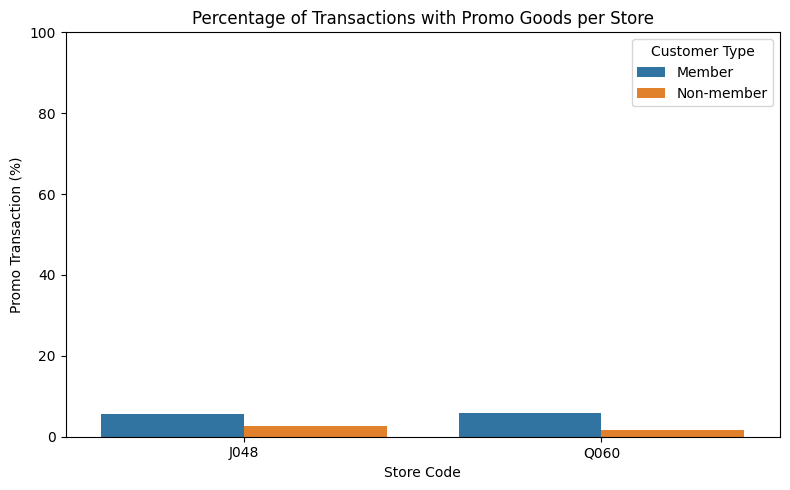

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='t_store_code', y='promo_percentage', hue='member_type')

plt.title('Percentage of Transactions with Promo Goods per Store')
plt.ylabel('Promo Transaction (%)')
plt.xlabel('Store Code')
plt.ylim(0, 100)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()